In [73]:
import os, os.path
import pandas as pd

In [74]:
hsData = pd.read_csv("2017_-2018_Diversity_Report_9_-_12_School.csv")

In [76]:
from numpy import nan

hsData.replace("No Data", nan, inplace=True)
hsData.replace("s", nan, inplace=True)

In [100]:
hsData[["DBN", "School Name"]].drop_duplicates().to_csv("SchoolDBNs.csv", index = False)

In [82]:
def p2f(x):
    if not pd.isnull(x):
        return float(x.strip('%'))/100
    else:
        return nan

In [83]:
hsData["%Hispanic"] = hsData["%Hispanic"].apply(p2f)

In [84]:
hsData["%Black"] = hsData["%Black"].apply(p2f)

In [85]:
hsData["%Minority"] = hsData["%Hispanic"] + hsData["%Black"]

In [127]:
diverseHS = hsData[hsData["%Minority"].notnull()].sort_values(by = "%Minority", ascending = False)[(hsData["%Minority"] > .5) & (hsData["%Minority"] < .9)][hsData["Category"] == "All Students"]
notDiverseHS = hsData[hsData["%Minority"].notnull()].sort_values(by = "%Minority", ascending = False)[(hsData["%Minority"] < .5) | (hsData["%Minority"] > .9)][hsData["Category"] == "All Students"]
notDiverseHS.to_csv("notDiverseHS.csv", index=False)
diverseHS.to_csv("diverseHD.csv", index = False)

C:\Users\evanb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\evanb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [132]:
SATData = pd.read_csv("2012_SAT_Results.csv")
SATData.replace("No Data", nan, inplace=True)
SATData.replace("s", nan, inplace=True)

In [133]:
def addSATdataset(hsData):
    hsSATData = pd.merge(hsData, SATData, left_on = ["School Name", "DBN"], right_on = ["SCHOOL NAME", "DBN"])
    hsSATData.drop(labels = "SCHOOL NAME", axis = 1, inplace=True)
    return hsSATData

In [134]:
diverseHSSATData = addSATdataset(diverseHS)
notDiverseHSSATData = addSATdataset(notDiverseHS)

In [99]:
hsData["School Name"] = hsData["School Name"].str.upper()

In [107]:
SATData = pd.read_csv("2012_SAT_Results.csv")

In [163]:
hsSATData = pd.merge(hsData, SATData, how = "left", left_on = ["DBN", "School Name"], right_on = ["DBN", "SCHOOL NAME"])

In [164]:
hsSATData = hsSATData[hsSATData["Category"] == "All Students"]

In [165]:
hsSATData.drop(labels = "SCHOOL NAME", axis = 1, inplace=True)

In [191]:
hsSATData["Diversity"] = 1 - (1/.49)*abs(0.7 - hsSATData["%Minority"])

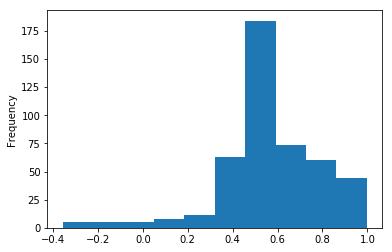

In [192]:
%matplotlib inline

hsSATData["Diversity"].plot(kind = "hist")

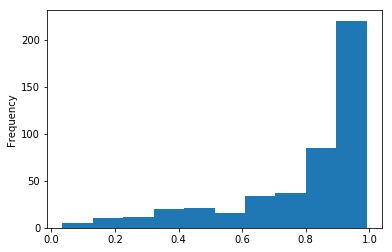

In [168]:
hsSATData["%Minority"].plot(kind = "hist")

In [183]:
schoolStats = pd.read_csv("schoolsData.csv", names = ["DBN", "Post-Secondary Enrollment (18mo)", "College Persistance", "College Readiness Index"])

In [184]:
hsSATDataWithStats = pd.merge(hsSATData, schoolStats, how = "left", on = "DBN")

In [189]:
for colname in ["Post-Secondary Enrollment (18mo)", "College Persistance", "College Readiness Index"]:
    hsSATDataWithStats[colname]= hsSATDataWithStats[colname].apply(p2f)

In [197]:
hsSATDataWithStats["SAT Math Avg. Score"] = hsSATDataWithStats["SAT Math Avg. Score"].astype("float")
hsSATDataWithStats["SAT Writing Avg. Score"] = hsSATDataWithStats["SAT Writing Avg. Score"].astype("float")
hsSATDataWithStats["SAT Critical Reading Avg. Score"] = hsSATDataWithStats["SAT Critical Reading Avg. Score"].astype("float")
hsSATDataWithStats["SAT Average"] = (hsSATDataWithStats["SAT Critical Reading Avg. Score"] + hsSATDataWithStats["SAT Math Avg. Score"] + hsSATDataWithStats["SAT Writing Avg. Score"])/3

In [202]:
colsOfNote = ["School Name", "Total Enrollment", "College Readiness Index", "College Persistance", "Post-Secondary Enrollment (18mo)", "SAT Average", "%Minority", "Diversity"]

In [216]:
hsSATDataWithStats[colsOfNote].to_csv("High School data.csv")

In [204]:
schoolLocations = pd.read_csv("2017_-_2018_School_Locations.csv")

In [215]:
pd.set_option('display.max_columns', None)
schoolLocations

,FISCAL_YEAR,ATS SYSTEM CODE,LOCATION_CODE,LOCATION_NAME,BEDS NUMBER,MANAGED_BY_NAME,LOCATION_TYPE_DESCRIPTION,LOCATION_CATEGORY_DESCRIPTION,GRADES_TEXT,GRADES_FINAL_TEXT,OPEN_DATE,STATUS_DESCRIPTIONS,PRIMARY_BUILDING_CODE,PRIMARY_ADDRESS_LINE_1,STATE_CODE,X_COORDINATE,Y_COORDINATE,COMMUNITY_DISTRICT,COUNCIL_DISTRICT,CENSUS_TRACT,BOROUGH_BLOCK_LOT,NTA,NTA_NAME,PRINCIPAL_NAME,PRINCIPAL_TITLE,PRINCIPAL_PHONE_NUMBER,FAX_NUMBER,GEOGRAPHICAL_DISTRICT_CODE,ADMIN_DISTRICT_LOCATION_CODE,ADMINISTRATIVE_DISTRICT_NAME,COMMUNITY_SCHOOL_SUP_NAME,FIELD_SUPPORT_CENTER_NAME,FIELD_SUPPORT_CENTER_LEADER_NAME,SCHOOL_SUPPORT_TEAM_NAME,SCHOOL_SUPPORT_TEAM_LEADER_NAME,HIGHSCHOOL_NETWORK_LOCATION_CODE,HIGHSCHOOL_NETWORK_NAME,HIGHSCHOOL_NETWORK_SUPERINTENDENT,Location 1
0,2018,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1904 12:00:00 AM,Open,M015,333 EAST 4 STREET,NY,990141.0,202349.0,103,2,2601,1003740020,MN28,Lower East Side ...,IRENE SANCHEZ,PRINCIPAL,212-228-8730,212-477-0931,1,M801,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"333 EAST 4 STREET\nMANHATTAN, NY 10009\n(40.72..."
1,2018,01M019,M019,P.S. 019 Asher Levy,310100010019,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1956 12:00:00 AM,Open,M019,185 1 AVENUE,NY,988547.0,205239.0,103,2,4000,1004530034,MN22,East Village ...,JACQUELINE FLANAGAN,PRINCIPAL,212-533-5340,212-673-1477,1,M801,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"185 1 AVENUE\nMANHATTAN, NY 10003\n(40.730009,..."
2,2018,01M020,M020,P.S. 020 Anna Silver,310100010020,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1963 12:00:00 AM,Open,M020,166 ESSEX STREET,NY,988044.0,202068.0,103,1,3001,1003550001,MN27,Chinatown ...,SARAH PINTO VIAGRAN,PRINCIPAL,212-254-9577,212-254-3526,1,M801,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"166 ESSEX STREET\nMANHATTAN, NY 10002\n(40.721..."
3,2018,01M034,M034,P.S. 034 Franklin D. Roosevelt,310100010034,DOE,General Academic,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE","PK,0K,01,02,03,04,05,06,07,08",07/01/1955 12:00:00 AM,Open,M034,730 EAST 12 STREET,NY,991163.0,203782.0,103,2,2800,1003810038,MN28,Lower East Side ...,ANGELIKI LOUKATOS,PRINCIPAL,212-228-4433,212-353-1973,1,M801,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"730 EAST 12 STREET\nMANHATTAN, NY 10009\n(40.7..."
4,2018,01M063,M063,The STAR Academy - P.S.63,310100010063,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1905 12:00:00 AM,Open,M063,121 EAST 3 STREET,NY,988071.0,203210.0,103,2,3200,1004310014,MN22,East Village ...,DARLENE CAMERON,PRINCIPAL,212-674-3180,212-420-9018,1,M801,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"121 EAST 3 STREET\nMANHATTAN, NY 10009\n(40.72..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2018,84X705,X705,Family Life Academy Charter School,320900860839,Charter,General Academic,K-8,"0K,01,02,03,04,05","0K,01,02,03,04,05",07/01/2000 12:00:00 AM,Open,XABC,14 WEST 170 STREET,NY,1006755.0,245418.0,204,16,21900,2028560029,BX26,Highbridge ...,Evelyn Centeno,PRINCIPAL,718-410-8100,718-410-8800,9,NaN,OFFICE OF CHARTER SCHOOLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"14 WEST 170 STREET\nBRONX, NY 10452\n(40.84026..."
1819,2018,84X706,X706,Harriet Tubman Charter School,320900860823,Charter,General Academic,K-8,"0K,

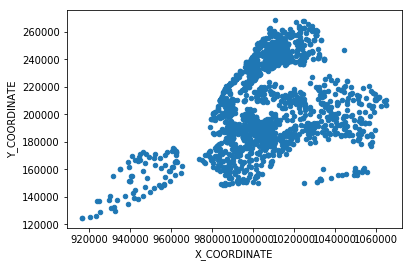

In [207]:
schoolLocations[["X_COORDINATE", "Y_COORDINATE"]].plot(kind="scatter", x = "X_COORDINATE", y = "Y_COORDINATE")

In [258]:
hsSATDataWithStats

,DBN,School Name,Category,Year,Total Enrollment,#Grade 9,#Grade 10,#Grade 11,#Grade 12,#Female,%Female,#Male,%Male,#Asian,%Asian,#Black,%Black,#Hispanic,%Hispanic,#Other,%Other,#White,%White,#ELL Spanish,%ELL Spanish,#ELL Chinese,%ELL Chinese,#ELL Bengali,%ELL Bengali,#ELL Arabic,%ELL Arabic,#ELL Haitian Creole,%ELL Haitian Creole,#ELL French,%ELL French,#ELL Russian,%ELL Russian,#ELL Korean,%ELL Korean,#ELL Urdu,%ELL Urdu,#ELL Other,%ELL Other,ELA #Test Takers,ELA #Level 1,ELA %Level 1,ELA #Level 2,ELA %Level 2,ELA #Level 3,ELA %Level 3,ELA #Level 4,ELA %Level 4,ELA #L3+L4,ELA %L3+L4,Math #Test Takers,Math #Level 1,Math %Level 1,Math #Level 2,Math %Level 2,Math #Level 3,Math %Level 3,Math #Level 4,Math %Level 4,Math #L3+L4,Math %L3+L4,%Minority,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Diversity,Post-Secondary Enrollment (18mo),College Persistance,College Readiness Index,SAT Average
0,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,2017-18,171,72,40,30,29,81,47.4%,90,52.6%,19,NaN,43,0.251,97,0.567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,10,14.3%,35,50.0%,19,27.1%,6,8.6%,25,35.7%,65,36,55.4%,26,40.0%,NaN,NaN,NaN,NaN,NaN,NaN,0.818,NaN,NaN,NaN,NaN,0.971584,0.43,0.27,0.62,NaN
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,All Students,2017-18,465,160,130,94,81,198,42.6%,267,57.4%,141,NaN,100,0.215,206,0.443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,23,16.8%,57,41.6%,48,35.0%,9,6.6%,57,41.6%,115,46,40.0%,40,34.8%,19,16.5%,10,8.7%,29,25.2%,0.658,91,383.0,423.0,366.0,0.996400,0.71,0.56,0.71,390.666667
2,01M450,EAST SIDE COMMUNITY SCHOOL,All Students,2017-18,385,95,100,93,97,181,47.0%,204,53.0%,48,NaN,74,0.192,210,0.545,12,3.1%,41,10.6%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN,NaN,30,43.5%,27,39.1%,NaN,NaN,NaN,NaN,68,NaN,NaN,34,50.0%,16,23.5%,NaN,NaN,NaN,NaN,0.737,70,377.0,402.0,370.0,0.997206,0.80,0.71,0.90,383.000000
3,01M458,FORSYTH SATELLITE ACADEMY,All Students,2017-18,203,16,65,79,43,117,57.6%,86,42.4%,NaN,NaN,70,0.345,121,0.596,NaN,NaN,9,4.4%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.941,7,414.0,401.0,359.0,0.881467,0.80,0.62,0.62,391.333333
4,01M509,MARTA VALLE HIGH SCHOOL,All Students,2017-18,148,39,33,38,38,88,59.5%,60,40.5%,7,NaN,47,0.318,88,0.595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,NaN,NaN,13,50.0%,7,26.9%,NaN,NaN,NaN,NaN,25,14,56.0%,10,40.0%,NaN,NaN,NaN,NaN,NaN,NaN,0.913,44,390.0,433.0,384.0,0.907410,0.59,0.44,0.30,402.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,32K549,THE BROOKLYN SCHOOL FOR SOCIAL JUSTICE,All Students,2017-18,364,54,90,100,120,170,46.7%,194,53.3%,NaN,NaN,69,0.190,275,0.755,NaN,NaN,11,3.0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,15,40.5%,17,45.9%,NaN,NaN,NaN,NaN,NaN,NaN,39,29,74.4%,7,17.9%,NaN,NaN,NaN,NaN,NaN,NaN,0.945,NaN,NaN,NaN,NaN,0.877500,0.53,0.40,0.24,NaN
474,32K552,THE ACADEMY OF URBAN PLANNING AND ENGINEERING,All Students,2017-18,197,53,40,44,60,85,43.1%,112,56.9%,NaN,NaN,35,0.178,154,0.782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,16,38.1%,20,47.6%,NaN,NaN,NaN,NaN,NaN,NaN,44,34,77.3%,10,22.7%,NaN,NaN,NaN,NaN,NaN,NaN,0.960,NaN,NaN,NaN,NaN,0.862041,0.42,0.28,0.34,NaN
475,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,All Students,2017-18,255,70,63,65,57,144,56.5%,111,43.5%,19,NaN,26,0.102,196,0.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [271]:
schoolLocations

,FISCAL_YEAR,ATS SYSTEM CODE,LOCATION_CODE,LOCATION_NAME,BEDS NUMBER,MANAGED_BY_NAME,LOCATION_TYPE_DESCRIPTION,LOCATION_CATEGORY_DESCRIPTION,GRADES_TEXT,GRADES_FINAL_TEXT,OPEN_DATE,STATUS_DESCRIPTIONS,PRIMARY_BUILDING_CODE,PRIMARY_ADDRESS_LINE_1,STATE_CODE,X_COORDINATE,Y_COORDINATE,COMMUNITY_DISTRICT,COUNCIL_DISTRICT,CENSUS_TRACT,BOROUGH_BLOCK_LOT,NTA,NTA_NAME,PRINCIPAL_NAME,PRINCIPAL_TITLE,PRINCIPAL_PHONE_NUMBER,FAX_NUMBER,GEOGRAPHICAL_DISTRICT_CODE,ADMIN_DISTRICT_LOCATION_CODE,ADMINISTRATIVE_DISTRICT_NAME,COMMUNITY_SCHOOL_SUP_NAME,FIELD_SUPPORT_CENTER_NAME,FIELD_SUPPORT_CENTER_LEADER_NAME,SCHOOL_SUPPORT_TEAM_NAME,SCHOOL_SUPPORT_TEAM_LEADER_NAME,HIGHSCHOOL_NETWORK_LOCATION_CODE,HIGHSCHOOL_NETWORK_NAME,HIGHSCHOOL_NETWORK_SUPERINTENDENT,Location 1
0,2018,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1904 12:00:00 AM,Open,M015,333 EAST 4 STREET,NY,990141.0,202349.0,103,2,2601,1003740020,MN28,Lower East Side ...,IRENE SANCHEZ,PRINCIPAL,212-228-8730,212-477-0931,1,M801,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"333 EAST 4 STREET\nMANHATTAN, NY 10009\n(40.72..."
1,2018,01M019,M019,P.S. 019 Asher Levy,310100010019,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1956 12:00:00 AM,Open,M019,185 1 AVENUE,NY,988547.0,205239.0,103,2,4000,1004530034,MN22,East Village ...,JACQUELINE FLANAGAN,PRINCIPAL,212-533-5340,212-673-1477,1,M801,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"185 1 AVENUE\nMANHATTAN, NY 10003\n(40.730009,..."
2,2018,01M020,M020,P.S. 020 Anna Silver,310100010020,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1963 12:00:00 AM,Open,M020,166 ESSEX STREET,NY,988044.0,202068.0,103,1,3001,1003550001,MN27,Chinatown ...,SARAH PINTO VIAGRAN,PRINCIPAL,212-254-9577,212-254-3526,1,M801,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"166 ESSEX STREET\nMANHATTAN, NY 10002\n(40.721..."
3,2018,01M034,M034,P.S. 034 Franklin D. Roosevelt,310100010034,DOE,General Academic,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE","PK,0K,01,02,03,04,05,06,07,08",07/01/1955 12:00:00 AM,Open,M034,730 EAST 12 STREET,NY,991163.0,203782.0,103,2,2800,1003810038,MN28,Lower East Side ...,ANGELIKI LOUKATOS,PRINCIPAL,212-228-4433,212-353-1973,1,M801,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"730 EAST 12 STREET\nMANHATTAN, NY 10009\n(40.7..."
4,2018,01M063,M063,The STAR Academy - P.S.63,310100010063,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",07/01/1905 12:00:00 AM,Open,M063,121 EAST 3 STREET,NY,988071.0,203210.0,103,2,3200,1004310014,MN22,East Village ...,DARLENE CAMERON,PRINCIPAL,212-674-3180,212-420-9018,1,M801,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"121 EAST 3 STREET\nMANHATTAN, NY 10009\n(40.72..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2018,84X705,X705,Family Life Academy Charter School,320900860839,Charter,General Academic,K-8,"0K,01,02,03,04,05","0K,01,02,03,04,05",07/01/2000 12:00:00 AM,Open,XABC,14 WEST 170 STREET,NY,1006755.0,245418.0,204,16,21900,2028560029,BX26,Highbridge ...,Evelyn Centeno,PRINCIPAL,718-410-8100,718-410-8800,9,NaN,OFFICE OF CHARTER SCHOOLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"14 WEST 170 STREET\nBRONX, NY 10452\n(40.84026..."
1819,2018,84X706,X706,Harriet Tubman Charter School,320900860823,Charter,General Academic,K-8,"0K,

In [275]:
pd.Series(list(set(hsSATDataWithStats["DBN"]).intersection(set(schoolLocations["ATS SYSTEM CODE"]))))

Series([], dtype: float64)

In [278]:
schoolLocations["ATS SYSTEM CODE"] = schoolLocations["ATS SYSTEM CODE"].str.strip()

In [279]:
hsSATDataStatsLocations = pd.merge(hsSATDataWithStats, schoolLocations, how = "left", left_on = "DBN", right_on = "ATS SYSTEM CODE")

In [280]:
hsSATDataStatsLocations

,DBN,School Name,Category,Year,Total Enrollment,#Grade 9,#Grade 10,#Grade 11,#Grade 12,#Female,%Female,#Male,%Male,#Asian,%Asian,#Black,%Black,#Hispanic,%Hispanic,#Other,%Other,#White,%White,#ELL Spanish,%ELL Spanish,#ELL Chinese,%ELL Chinese,#ELL Bengali,%ELL Bengali,#ELL Arabic,%ELL Arabic,#ELL Haitian Creole,%ELL Haitian Creole,#ELL French,%ELL French,#ELL Russian,%ELL Russian,#ELL Korean,%ELL Korean,#ELL Urdu,%ELL Urdu,#ELL Other,%ELL Other,ELA #Test Takers,ELA #Level 1,ELA %Level 1,ELA #Level 2,ELA %Level 2,ELA #Level 3,ELA %Level 3,ELA #Level 4,ELA %Level 4,ELA #L3+L4,ELA %L3+L4,Math #Test Takers,Math #Level 1,Math %Level 1,Math #Level 2,Math %Level 2,Math #Level 3,Math %Level 3,Math #Level 4,Math %Level 4,Math #L3+L4,Math %L3+L4,%Minority,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Diversity,Post-Secondary Enrollment (18mo),College Persistance,College Readiness Index,SAT Average,FISCAL_YEAR,ATS SYSTEM CODE,LOCATION_CODE,LOCATION_NAME,BEDS NUMBER,MANAGED_BY_NAME,LOCATION_TYPE_DESCRIPTION,LOCATION_CATEGORY_DESCRIPTION,GRADES_TEXT,GRADES_FINAL_TEXT,OPEN_DATE,STATUS_DESCRIPTIONS,PRIMARY_BUILDING_CODE,PRIMARY_ADDRESS_LINE_1,STATE_CODE,X_COORDINATE,Y_COORDINATE,COMMUNITY_DISTRICT,COUNCIL_DISTRICT,CENSUS_TRACT,BOROUGH_BLOCK_LOT,NTA,NTA_NAME,PRINCIPAL_NAME,PRINCIPAL_TITLE,PRINCIPAL_PHONE_NUMBER,FAX_NUMBER,GEOGRAPHICAL_DISTRICT_CODE,ADMIN_DISTRICT_LOCATION_CODE,ADMINISTRATIVE_DISTRICT_NAME,COMMUNITY_SCHOOL_SUP_NAME,FIELD_SUPPORT_CENTER_NAME,FIELD_SUPPORT_CENTER_LEADER_NAME,SCHOOL_SUPPORT_TEAM_NAME,SCHOOL_SUPPORT_TEAM_LEADER_NAME,HIGHSCHOOL_NETWORK_LOCATION_CODE,HIGHSCHOOL_NETWORK_NAME,HIGHSCHOOL_NETWORK_SUPERINTENDENT,Location 1
0,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,2017-18,171,72,40,30,29,81,47.4%,90,52.6%,19,NaN,43,0.251,97,0.567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,10,14.3%,35,50.0%,19,27.1%,6,8.6%,25,35.7%,65,36,55.4%,26,40.0%,NaN,NaN,NaN,NaN,NaN,NaN,0.818,NaN,NaN,NaN,NaN,0.971584,0.43,0.27,0.62,NaN,2018,01M292,M292,Orchard Collegiate Academy,310100011292,DOE,General Academic,High school,"09,10,11,12,SE","09,10,11,12",09/08/2004 12:00:00 AM,Open,M056,220 HENRY STREET,NY,988117.0,199174.0,103,1,201,1002690041,MN28,Lower East Side ...,MILES DOYLE,PRINCIPAL,212-406-9411,NaN,1,M801,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"220 HENRY STREET\nMANHATTAN, NY 10002\n(40.713..."
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,All Students,2017-18,465,160,130,94,81,198,42.6%,267,57.4%,141,NaN,100,0.215,206,0.443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,23,16.8%,57,41.6%,48,35.0%,9,6.6%,57,41.6%,115,46,40.0%,40,34.8%,19,16.5%,10,8.7%,29,25.2%,0.658,91,383.0,423.0,366.0,0.996400,0.71,0.56,0.71,390.666667,2018,01M448,M448,University Neighborhood High School,310100011448,DOE,General Academic,High school,"09,10,11,12,SE","09,10,11,12",06/04/1999 12:00:00 AM,Open,M446,200 MONROE STREET,NY,988650.0,198776.0,103,1,202,1002590044,MN28,Lower East Side ...,Elizabeth Collins,PRINCIPAL,212-962-4341,212-267-5611,1,HS04,NaN,NaN,Field Support Center - Manhattan,"CHU, YUET",School Support Team 1- Manhattan,NaN,HS04,HS Network 04 Superintendent Office,"ROSALES, MARISOL","200 MONROE STREET\nMANHATTAN, NY 10002\n(40.71..."
2,01M450,EAST SIDE COMMUNITY SCHOOL,All Students,2017-18,385,95,100,93,97,181,47.0%,204,53.0%,48,NaN,74,0.192,210,0.545,12,3.1%,41,10.6%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN,NaN,30,43.5%,27,39.1%,NaN,NaN,NaN,NaN,68,NaN,NaN,34,50.0%,16,23.5%,NaN,NaN,NaN,NaN,0.737,70,377.0,402.0,370.0,0.997206,0.80,0.71,0.90,383.000000,2018,01M450,M450,East Side Community School,310100011450,DOE,General Academic,Secondary School,"06,07,08,09,10,11,12,SE","06,07,08,09,10,11,12",06/05/1996 12:00:00 AM,Open,M060,420 EAST 12 STRE

In [281]:
import json, urllib

In [282]:
def getLat(primaryAddr):
    link = "https://geosearch.planninglabs.nyc/v1/search?text={}".format(primaryAddr).replace(" ", "%20")
    response = urllib.request.urlopen(link)
    data = json.loads(response.read())
    coordinates = data['features'][0]["geometry"]["coordinates"]
    lat = coordinates[1]
    return lat

In [283]:
hsSATDataStatsLocations["Latitude"] = hsSATDataStatsLocations["PRIMARY_ADDRESS_LINE_1"].apply(getLat)

In [284]:
def getLong(primaryAddr):
    link = "https://geosearch.planninglabs.nyc/v1/search?text={}".format(primaryAddr).replace(" ", "%20")
    response = urllib.request.urlopen(link)
    data = json.loads(response.read())
    coordinates = data['features'][0]["geometry"]["coordinates"]
    long = coordinates[0]
    return long

In [285]:
hsSATDataStatsLocations["Longitude"] = hsSATDataStatsLocations["PRIMARY_ADDRESS_LINE_1"].apply(getLong)

In [286]:
hsSATDataStatsLocations

,DBN,School Name,Category,Year,Total Enrollment,#Grade 9,#Grade 10,#Grade 11,#Grade 12,#Female,%Female,#Male,%Male,#Asian,%Asian,#Black,%Black,#Hispanic,%Hispanic,#Other,%Other,#White,%White,#ELL Spanish,%ELL Spanish,#ELL Chinese,%ELL Chinese,#ELL Bengali,%ELL Bengali,#ELL Arabic,%ELL Arabic,#ELL Haitian Creole,%ELL Haitian Creole,#ELL French,%ELL French,#ELL Russian,%ELL Russian,#ELL Korean,%ELL Korean,#ELL Urdu,%ELL Urdu,#ELL Other,%ELL Other,ELA #Test Takers,ELA #Level 1,ELA %Level 1,ELA #Level 2,ELA %Level 2,ELA #Level 3,ELA %Level 3,ELA #Level 4,ELA %Level 4,ELA #L3+L4,ELA %L3+L4,Math #Test Takers,Math #Level 1,Math %Level 1,Math #Level 2,Math %Level 2,Math #Level 3,Math %Level 3,Math #Level 4,Math %Level 4,Math #L3+L4,Math %L3+L4,%Minority,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Diversity,Post-Secondary Enrollment (18mo),College Persistance,College Readiness Index,SAT Average,FISCAL_YEAR,ATS SYSTEM CODE,LOCATION_CODE,LOCATION_NAME,BEDS NUMBER,MANAGED_BY_NAME,LOCATION_TYPE_DESCRIPTION,LOCATION_CATEGORY_DESCRIPTION,GRADES_TEXT,GRADES_FINAL_TEXT,OPEN_DATE,STATUS_DESCRIPTIONS,PRIMARY_BUILDING_CODE,PRIMARY_ADDRESS_LINE_1,STATE_CODE,X_COORDINATE,Y_COORDINATE,COMMUNITY_DISTRICT,COUNCIL_DISTRICT,CENSUS_TRACT,BOROUGH_BLOCK_LOT,NTA,NTA_NAME,PRINCIPAL_NAME,PRINCIPAL_TITLE,PRINCIPAL_PHONE_NUMBER,FAX_NUMBER,GEOGRAPHICAL_DISTRICT_CODE,ADMIN_DISTRICT_LOCATION_CODE,ADMINISTRATIVE_DISTRICT_NAME,COMMUNITY_SCHOOL_SUP_NAME,FIELD_SUPPORT_CENTER_NAME,FIELD_SUPPORT_CENTER_LEADER_NAME,SCHOOL_SUPPORT_TEAM_NAME,SCHOOL_SUPPORT_TEAM_LEADER_NAME,HIGHSCHOOL_NETWORK_LOCATION_CODE,HIGHSCHOOL_NETWORK_NAME,HIGHSCHOOL_NETWORK_SUPERINTENDENT,Location 1,Latitude,Longitude
0,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,2017-18,171,72,40,30,29,81,47.4%,90,52.6%,19,NaN,43,0.251,97,0.567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,10,14.3%,35,50.0%,19,27.1%,6,8.6%,25,35.7%,65,36,55.4%,26,40.0%,NaN,NaN,NaN,NaN,NaN,NaN,0.818,NaN,NaN,NaN,NaN,0.971584,0.43,0.27,0.62,NaN,2018,01M292,M292,Orchard Collegiate Academy,310100011292,DOE,General Academic,High school,"09,10,11,12,SE","09,10,11,12",09/08/2004 12:00:00 AM,Open,M056,220 HENRY STREET,NY,988117.0,199174.0,103,1,201,1002690041,MN28,Lower East Side ...,MILES DOYLE,PRINCIPAL,212-406-9411,NaN,1,M801,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"220 HENRY STREET\nMANHATTAN, NY 10002\n(40.713...",40.713337,-73.986447
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,All Students,2017-18,465,160,130,94,81,198,42.6%,267,57.4%,141,NaN,100,0.215,206,0.443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,23,16.8%,57,41.6%,48,35.0%,9,6.6%,57,41.6%,115,46,40.0%,40,34.8%,19,16.5%,10,8.7%,29,25.2%,0.658,91,383.0,423.0,366.0,0.996400,0.71,0.56,0.71,390.666667,2018,01M448,M448,University Neighborhood High School,310100011448,DOE,General Academic,High school,"09,10,11,12,SE","09,10,11,12",06/04/1999 12:00:00 AM,Open,M446,200 MONROE STREET,NY,988650.0,198776.0,103,1,202,1002590044,MN28,Lower East Side ...,Elizabeth Collins,PRINCIPAL,212-962-4341,212-267-5611,1,HS04,NaN,NaN,Field Support Center - Manhattan,"CHU, YUET",School Support Team 1- Manhattan,NaN,HS04,HS Network 04 Superintendent Office,"ROSALES, MARISOL","200 MONROE STREET\nMANHATTAN, NY 10002\n(40.71...",40.712257,-73.983976
2,01M450,EAST SIDE COMMUNITY SCHOOL,All Students,2017-18,385,95,100,93,97,181,47.0%,204,53.0%,48,NaN,74,0.192,210,0.545,12,3.1%,41,10.6%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN,NaN,30,43.5%,27,39.1%,NaN,NaN,NaN,NaN,68,NaN,NaN,34,50.0%,16,23.5%,NaN,NaN,NaN,NaN,0.737,70,377.0,402.0,370.0,0.997206,0.80,0.71,0.90,383.000000,2018,01M450,M450,East Side Community School,310100011450,DOE,General Academic,Secondary School,"06,07,08,09,10,11,12,SE","06,07,08,0

In [287]:
colsOfNote = ["School Name", "Total Enrollment", "College Readiness Index", "College Persistance", "Post-Secondary Enrollment (18mo)", "SAT Average", "%Minority", "Diversity", "Longitude", "Latitude"]

In [290]:
hsSATDataStatsLocations[colsOfNote]

,School Name,Total Enrollment,College Readiness Index,College Persistance,Post-Secondary Enrollment (18mo),SAT Average,%Minority,Diversity,Longitude,Latitude
0,ORCHARD COLLEGIATE ACADEMY,171,0.62,0.27,0.43,NaN,0.818,0.971584,-73.986447,40.713337
1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,465,0.71,0.56,0.71,390.666667,0.658,0.996400,-73.983976,40.712257
2,EAST SIDE COMMUNITY SCHOOL,385,0.90,0.71,0.80,383.000000,0.737,0.997206,-73.982675,40.729151
3,FORSYTH SATELLITE ACADEMY,203,0.62,0.62,0.80,391.333333,0.941,0.881467,-73.990486,40.722421
4,MARTA VALLE HIGH SCHOOL,148,0.30,0.44,0.59,402.333333,0.913,0.907410,-73.985960,40.720195
...,...,...,...,...,...,...,...,...,...,...
473,THE BROOKLYN SCHOOL FOR SOCIAL JUSTICE,364,0.24,0.40,0.53,NaN,0.945,0.877500,-73.911721,40.696937
474,THE ACADEMY OF URBAN PLANNING AND ENGINEERING,197,0.34,0.28,0.42,NaN,0.960,0.862041,-73.911721,40.696937
475,ALL CITY LEADERSHIP SECONDARY SCHOOL,255,0.86,0.62,0.87,438.333333,0.871,0.940324,-73.913189,40.697675
476,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,281,0.26,0.41,0.54,NaN,0.961,0.860978,-73.927347,40.695204


In [292]:
hsSATDataStatsLocations[hsSATDataStatsLocations["School Name"] == "STUYVESANT HIGH SCHOOL"]

,DBN,School Name,Category,Year,Total Enrollment,#Grade 9,#Grade 10,#Grade 11,#Grade 12,#Female,%Female,#Male,%Male,#Asian,%Asian,#Black,%Black,#Hispanic,%Hispanic,#Other,%Other,#White,%White,#ELL Spanish,%ELL Spanish,#ELL Chinese,%ELL Chinese,#ELL Bengali,%ELL Bengali,#ELL Arabic,%ELL Arabic,#ELL Haitian Creole,%ELL Haitian Creole,#ELL French,%ELL French,#ELL Russian,%ELL Russian,#ELL Korean,%ELL Korean,#ELL Urdu,%ELL Urdu,#ELL Other,%ELL Other,ELA #Test Takers,ELA #Level 1,ELA %Level 1,ELA #Level 2,ELA %Level 2,ELA #Level 3,ELA %Level 3,ELA #Level 4,ELA %Level 4,ELA #L3+L4,ELA %L3+L4,Math #Test Takers,Math #Level 1,Math %Level 1,Math #Level 2,Math %Level 2,Math #Level 3,Math %Level 3,Math #Level 4,Math %Level 4,Math #L3+L4,Math %L3+L4,%Minority,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Diversity,Post-Secondary Enrollment (18mo),College Persistance,College Readiness Index,SAT Average,FISCAL_YEAR,ATS SYSTEM CODE,LOCATION_CODE,LOCATION_NAME,BEDS NUMBER,MANAGED_BY_NAME,LOCATION_TYPE_DESCRIPTION,LOCATION_CATEGORY_DESCRIPTION,GRADES_TEXT,GRADES_FINAL_TEXT,OPEN_DATE,STATUS_DESCRIPTIONS,PRIMARY_BUILDING_CODE,PRIMARY_ADDRESS_LINE_1,STATE_CODE,X_COORDINATE,Y_COORDINATE,COMMUNITY_DISTRICT,COUNCIL_DISTRICT,CENSUS_TRACT,BOROUGH_BLOCK_LOT,NTA,NTA_NAME,PRINCIPAL_NAME,PRINCIPAL_TITLE,PRINCIPAL_PHONE_NUMBER,FAX_NUMBER,GEOGRAPHICAL_DISTRICT_CODE,ADMIN_DISTRICT_LOCATION_CODE,ADMINISTRATIVE_DISTRICT_NAME,COMMUNITY_SCHOOL_SUP_NAME,FIELD_SUPPORT_CENTER_NAME,FIELD_SUPPORT_CENTER_LEADER_NAME,SCHOOL_SUPPORT_TEAM_NAME,SCHOOL_SUPPORT_TEAM_LEADER_NAME,HIGHSCHOOL_NETWORK_LOCATION_CODE,HIGHSCHOOL_NETWORK_NAME,HIGHSCHOOL_NETWORK_SUPERINTENDENT,Location 1,Latitude,Longitude
51,02M475,STUYVESANT HIGH SCHOOL,All Students,2017-18,3336,823,857,828,828,1428,42.8%,1906,57.1%,2451,NaN,24,0.007,92,0.028,174,5.2%,595,17.8%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,NaN,NaN,NaN,111,15.1%,622,84.6%,733,99.7%,338,NaN,NaN,NaN,NaN,19,5.6%,318,94.1%,337,99.7%,0.035,832,679.0,735.0,682.0,0.0975,1.0,0.96,0.99,698.666667,2018,02M475,M475,Stuyvesant High School,310200011475,DOE,General Academic,High school,"09,10,11,12","09,10,11,12",06/05/1996 12:00:00 AM,Open,M477,345 CHAMBERS STREET,NY,980391.0,200873.0,101,1,31703,1000160215,MN25,Battery Park City-Lower Manhattan ...,Eric Contreras,PRINCIPAL,212-312-4800,212-587-3874,2,HS04,NaN,NaN,Field Support Center - Manhattan,"CHU, YUET",School Support Team 1- Manhattan,NaN,HS04,HS Network 04 Superintendent Office,"ROSALES, MARISOL","345 CHAMBERS STREET\nMANHATTAN, NY 10282\n(40....",40.717943,-74.013798


0.007194244604316547